In [1]:
using PyPlot

In [14]:
include("../src/model.jl");
include("../src/diagnostics.jl");
include("../src/optimize.jl");
include("../src/plotting.jl");

## Model setup

#### Physical parameters

In [21]:
# Model domain
t = Array(2020:1.:2100);

# "Best-guess equilibrium climate sensitivity"
ECS = 3.0;

#### Economic parameters

In [22]:
β = 1.5 # damages (trillion USD / year / celsius^2)
utility_discount_rate = 0.014 # ρ (relative low value from Stern review)

GWP = 100. # global world product (trillion $ / year)

# Control technology cost scales (for full deployment, α=1.)
reduce_cost = 0.10*GWP;
remove_cost = 0.15*GWP;
geoeng_cost = 0.25*GWP;
adapt_cost = 0.20*GWP;

In [23]:
baseline_emissions_scenario = baseline_emissions(t, 5., 2100., 10.)

economics = Economics(
    β, utility_discount_rate,
    reduce_cost, remove_cost, geoeng_cost, adapt_cost,
    0., 0., 0., 0., # Assumed initial condition of no deployments in 2020
    baseline_emissions_scenario
);

### Initialize model

In [24]:
ensemble = Dict{String, ClimateModel}();

name = "Example configuration";
present_year = 2020.

# Arbitrary initial guess of climate control policies,
# to be optimized later!
controls = init_linear_controls(t);

# Create instance of idealized integrated assessment climate model
model = ClimateModel(name, ECS, t, controls, economics, present_year);

## Model optimization

In [25]:
# optimize model for lowest total (cumulative discounted) net (damages + controls) cost.
@time optimize!(model)
ensemble[model.name] = model;

Converged after 1090 iterations.   8.372503 seconds (47.11 M allocations: 17.181 GiB, 12.49% gc time)


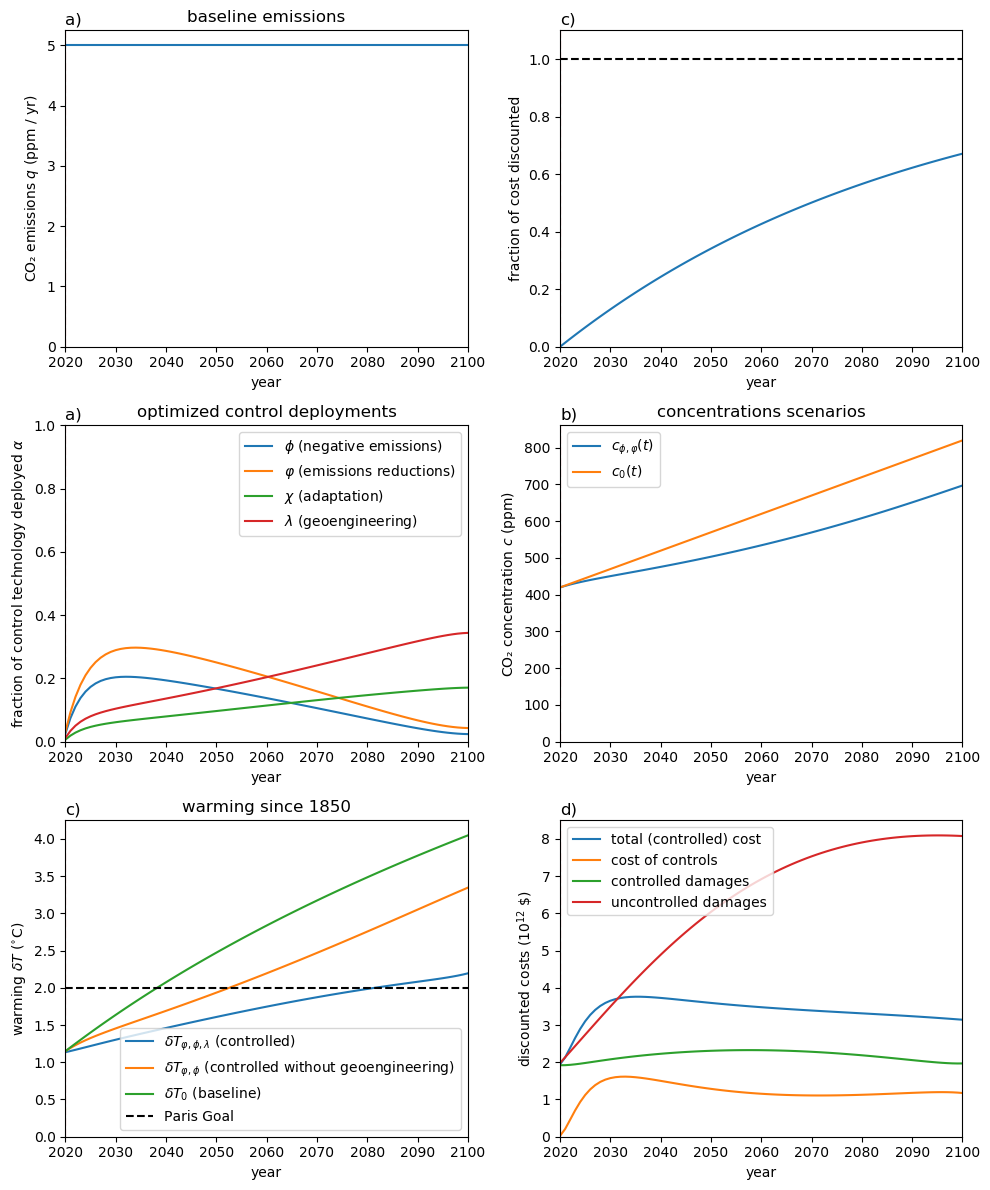

In [26]:
# plot optimized model state
plot_state(model)